In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import pickle as pkl
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pygraphviz as pgv
from IPython.display import Image

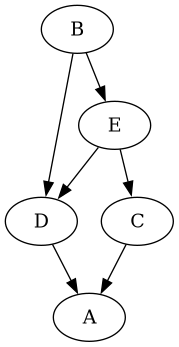

In [11]:
with open('output/graph.pkl', 'rb') as f:
    graph = pkl.load(f)

import pygraphviz as pgv
from IPython.display import Image

# Generate a graphviz object
gviz = graph.to_graphviz()

# Render the graph to a PNG image and display it inline
output_path = 'graph.png'
gviz.draw(output_path, prog='dot', format='png')  # Use 'dot' or another Graphviz layout engine

# Display the image
Image(output_path)

In [12]:
posterior = np.load('output/posterior.npy')
posterior.shape

(1000, 5, 5)

In [13]:
# in posteriors, the first dimension is the number of samples.
# find unique samples, and how many times they occur

unique_samples, counts = np.unique(posterior, axis=0, return_counts=True)

# sort the counts in descending order
sorted_indices = np.argsort(-counts)

unique_samples = unique_samples[sorted_indices]
counts = counts[sorted_indices]

In [14]:
unique_samples.shape

(119, 5, 5)

26


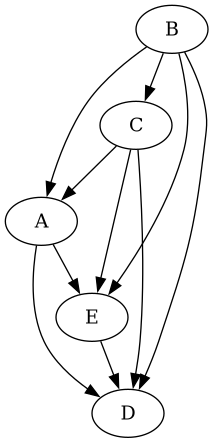

25


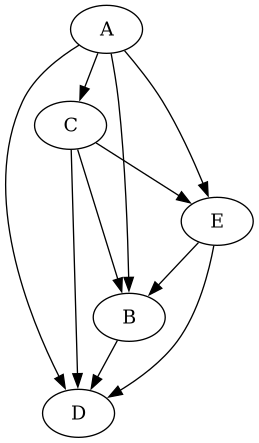

23


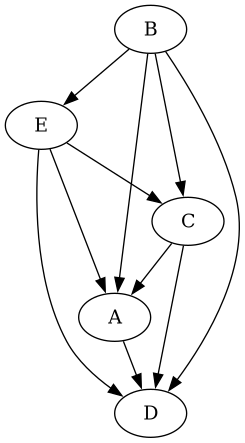

In [15]:
# for each unique samples, draw the graph, and print the count. each sample is a NxN numpy array
# use pygraphviz to draw the graph

labels_list = ["A", "B", "C","D","E"]


for i, sample in enumerate(unique_samples[:3]):
    graph = nx.from_numpy_array(sample, create_using=nx.DiGraph)

    # Set custom labels for each node
    labels = {node: labels_list[node] for node in graph.nodes()}
    
    # Apply labels to the graph
    for node in graph.nodes():
        graph.nodes[node]['label'] = labels[node]

    
    gviz = nx.nx_agraph.to_agraph(graph)
    # Render the graph to a PNG image and display it inline
    output_path = 'graph.png'
    gviz.draw(output_path, prog='dot', format='png')  # Use 'dot' or another Graphviz layout engine

    print(counts[i])
    # Display the image
    display(Image(output_path))